In [47]:
import torch
import torch
import matplotlib.pyplot as plt

# Reproducibility
torch.manual_seed(1)
N = 2000  
P= 200
# Scatter of x vs y 
 

# -------------------------
# 2) Generate f (3 x 200)
#    f[0,i] ~ t1_i * N(0,1), f[1,i], f[2,i] ~ t2_i * N(0,1)
# -------------------------

t0 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t1 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t2 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t11 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t12 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t21 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t22 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1

a0 = t0 * torch.randn(P)
b1 = t1 * torch.randn(P)
b2 = t2 * torch.randn(P)
detla11= t11 *torch.randn(P)

detla12= t11 *torch.randn(P)
detla21= t11 *torch.randn(P)
detla22= t11 *torch.randn(P)  
f_mat = torch.stack([a0,b1,b2, detla11, detla12,detla21, detla22 ], dim=0)
f_mat

tensor([[ 0.8993,  0.4417, -0.0000,  ...,  0.6032, -1.8230, -0.0000],
        [-0.0000, -0.0000,  0.0000,  ...,  0.0000, -0.5855,  1.6023],
        [-0.0000,  0.0000, -0.2332,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.0000,  0.0000,  0.0000,  ...,  1.2064,  0.0000,  0.0781],
        [-0.0000,  0.0000, -0.0000,  ...,  0.0251, -0.0000, -0.7000],
        [-0.0000,  0.0000, -0.0000,  ...,  0.0824, -0.0000,  1.9809]])

In [48]:

N= 1000

L = torch.zeros(N, 7, dtype=torch.float32)


L[:,0]=1
L[0:500, 1]=1

L [500:,2]=1
L[0:250,3]=1
L[251:500,4]=1

L[501:750,5]=1

L[751:,6]=1

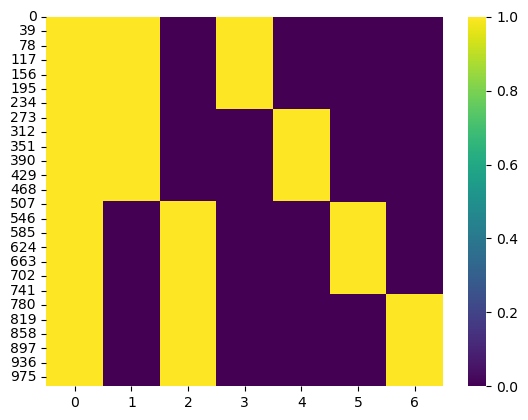

In [49]:
import seaborn as sns

sns.heatmap(L , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()


In [50]:
L.shape

torch.Size([1000, 7])

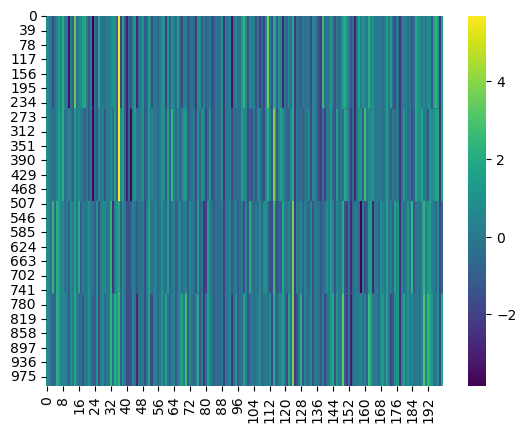

In [51]:
X_true= L@f_mat 
Z = L@f_mat + torch.randn(N, M) #* 2.5  # (N, M)
sns.heatmap(X_true , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()

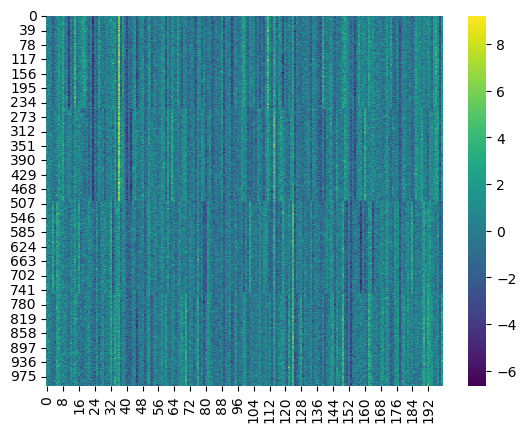

In [53]:
sns.heatmap(Z , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()

In [ ]:
mycebmf1=  cEBMF(data=Z, X_l=X,
                 prior_L="cgb" ) 
mycebmf1.initialize()
mycebmf1.fit(10)